In [ ]:
import matplotlib.pyplot as plt
from torchsummary import summary
from dataloader import get_data_loader
from utils import get_train_parameters, get_schedular, classes_dict
from train import train, train_losses, train_acc
from test import test, test_losses, test_acc
import numpy as np

In [ ]:
num_epochs = 24
batch_size = 512
train_loader, test_loader = get_data_loader(batch_size)

In [ ]:
model, device, optimizer, criterion = get_train_parameters()
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,456
      BatchNorm2d-14          [-1,

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.01E-03


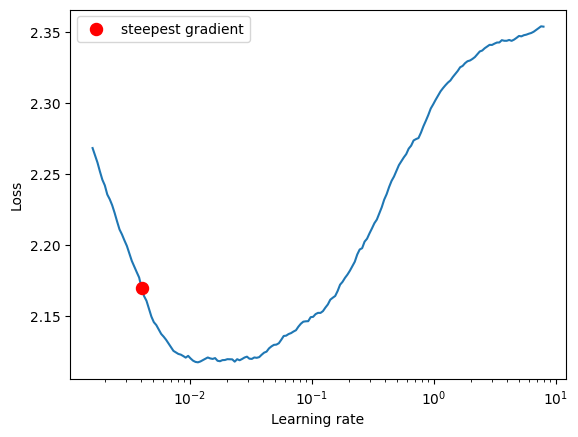

In [ ]:
from torch_lr_finder import LRFinder
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")

lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state


In [ ]:
schedular = get_schedular(train_loader, num_epochs, max_lr = 4.01E-03)


In [ ]:
EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, criterion, epoch, scheduler)
    test(model, device, test_loader, criterion)

EPOCH: 0


LR = 0.0005294590759979696 Loss=1.9676728248596191 Batch_id=97 Accuracy=41.09: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]



Test set: Average loss: 0.0040, Accuracy: 4859/10000 (48.59%)

EPOCH: 1


LR = 0.0014951103256289587 Loss=1.8747624158859253 Batch_id=97 Accuracy=55.98: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0038, Accuracy: 5685/10000 (56.85%)

EPOCH: 2


LR = 0.0026870478906998053 Loss=1.7510137557983398 Batch_id=97 Accuracy=64.98: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.0036, Accuracy: 6425/10000 (64.25%)

EPOCH: 3


LR = 0.003648190124896798 Loss=1.8026753664016724 Batch_id=97 Accuracy=70.66: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.0037, Accuracy: 6202/10000 (62.02%)

EPOCH: 4


LR = 0.004009997146203945 Loss=1.704323410987854 Batch_id=97 Accuracy=72.08: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.0035, Accuracy: 7170/10000 (71.70%)

EPOCH: 5


LR = 0.003982094909163716 Loss=1.7035460472106934 Batch_id=97 Accuracy=74.57: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]



Test set: Average loss: 0.0034, Accuracy: 7660/10000 (76.60%)

EPOCH: 6


LR = 0.0039002628956679676 Loss=1.7122259140014648 Batch_id=97 Accuracy=76.75: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]



Test set: Average loss: 0.0034, Accuracy: 7594/10000 (75.94%)

EPOCH: 7


LR = 0.0037667332697247265 Loss=1.6956552267074585 Batch_id=97 Accuracy=78.00: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.0034, Accuracy: 7775/10000 (77.75%)

EPOCH: 8


LR = 0.0035851483714439674 Loss=1.648762822151184 Batch_id=97 Accuracy=79.01: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0033, Accuracy: 8039/10000 (80.39%)

EPOCH: 9


LR = 0.003360461363494289 Loss=1.6887497901916504 Batch_id=97 Accuracy=80.17: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]



Test set: Average loss: 0.0033, Accuracy: 8039/10000 (80.39%)

EPOCH: 10


LR = 0.003098801121737242 Loss=1.6488505601882935 Batch_id=97 Accuracy=81.25: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]



Test set: Average loss: 0.0033, Accuracy: 8068/10000 (80.68%)

EPOCH: 11


LR = 0.0028073050554706163 Loss=1.6395394802093506 Batch_id=97 Accuracy=82.26: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0033, Accuracy: 8236/10000 (82.36%)

EPOCH: 12


LR = 0.002493924417508632 Loss=1.6058484315872192 Batch_id=97 Accuracy=83.46: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.0033, Accuracy: 8066/10000 (80.66%)

EPOCH: 13


LR = 0.0021672074147325404 Loss=1.6335198879241943 Batch_id=97 Accuracy=84.65: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]



Test set: Average loss: 0.0033, Accuracy: 8072/10000 (80.72%)

EPOCH: 14


LR = 0.00183606603529041 Loss=1.63713800907135 Batch_id=97 Accuracy=85.10: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]



Test set: Average loss: 0.0032, Accuracy: 8386/10000 (83.86%)

EPOCH: 15


LR = 0.0015095329527922716 Loss=1.5855802297592163 Batch_id=97 Accuracy=86.89: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.0032, Accuracy: 8647/10000 (86.47%)

EPOCH: 16


LR = 0.0011965151385204566 Loss=1.5681350231170654 Batch_id=97 Accuracy=88.04: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0032, Accuracy: 8582/10000 (85.82%)

EPOCH: 17


LR = 0.0009055509024717578 Loss=1.5820226669311523 Batch_id=97 Accuracy=89.28: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]



Test set: Average loss: 0.0032, Accuracy: 8720/10000 (87.20%)

EPOCH: 18


LR = 0.0006445769905184305 Loss=1.5547308921813965 Batch_id=97 Accuracy=90.40: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]



Test set: Average loss: 0.0032, Accuracy: 8852/10000 (88.52%)

EPOCH: 19


LR = 0.00042071209067034423 Loss=1.5383435487747192 Batch_id=97 Accuracy=91.99: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]



Test set: Average loss: 0.0031, Accuracy: 8931/10000 (89.31%)

EPOCH: 20


LR = 0.0002400626538231172 Loss=1.502631664276123 Batch_id=97 Accuracy=93.09: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]



Test set: Average loss: 0.0031, Accuracy: 8984/10000 (89.84%)

EPOCH: 21


LR = 0.00010755632569600475 Loss=1.528795838356018 Batch_id=97 Accuracy=94.10: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0031, Accuracy: 9036/10000 (90.36%)

EPOCH: 22


LR = 2.680753350209776e-05 Loss=1.516947865486145 Batch_id=97 Accuracy=94.49: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.0031, Accuracy: 9068/10000 (90.68%)

EPOCH: 23


LR = 1.88937960545355e-08 Loss=1.513918161392212 Batch_id=97 Accuracy=94.68: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.0031, Accuracy: 9067/10000 (90.67%)



Text(0.5, 1.0, 'Test Accuracy')

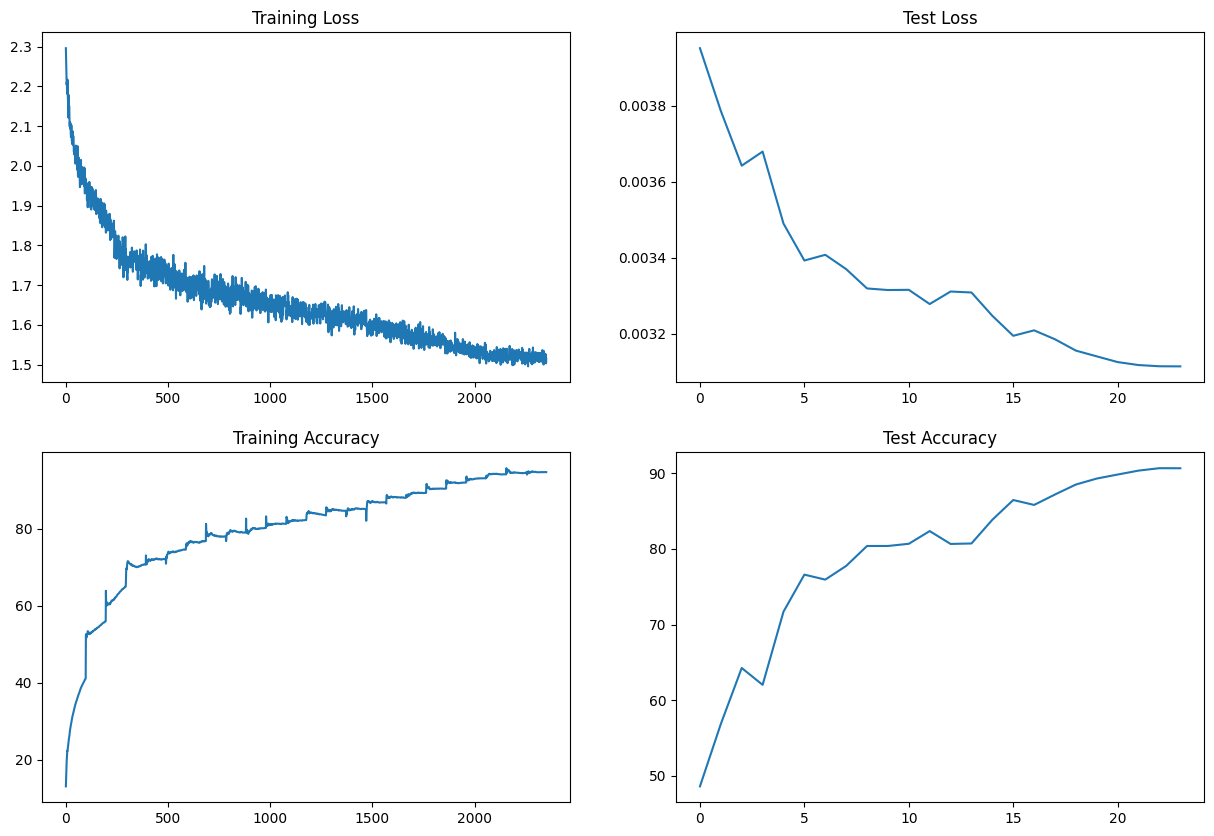

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([i.item() for i in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")